In [2]:
import os 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import shutil
import random
from pathlib import Path
import torch.nn as nn
import torch.optim as optim
from torchvision.models import mobilenet_v2
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report
import torch
import joblib

batch_size_train = 64
batch_size_val = 64
batch_size_test = 64
transform = transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = datasets.ImageFolder(root = "Dataset/train" , transform = transform)
val_dataset = datasets.ImageFolder(root = "Dataset/val", transform = transform)
test_dataset = datasets.ImageFolder(root= "Dataset/test", transform= transform)

train_loader = DataLoader(train_dataset,batch_size_train,shuffle = True)
val_loader = DataLoader(val_dataset,batch_size_val, shuffle = False)
test_loader = DataLoader(test_dataset, batch_size_test, shuffle=False)

class_names = train_dataset.classes
joblib.dump(class_names, 'class_names.pkl')


['class_names.pkl']

In [2]:
def plot_training_history(train_losses, val_losses, train_accs, val_accs):
    plt.figure(figsize=(12, 5))
    
    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.title('Loss Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    
    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(train_accs, label='Train Accuracy')
    plt.plot(val_accs, label='Val Accuracy')
    plt.title('Accuracy Evolution')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

In [3]:
def evaluate_model(model, dataloader, device):
    model.eval()
    all_preds = []
    all_labels = []
    
    with torch.no_grad():
        for inputs, labels in dataloader:
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())
    
    # Matrice de confusion
    cm = confusion_matrix(all_labels, all_preds)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    
    print(classification_report(all_labels, all_preds))
    
    return np.mean(np.array(all_preds) == np.array(all_labels))

# Entrainement de la premiers version du ModeleMobileNetV2 

In [ ]:
model = mobilenet_v2(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(num_features,14)
)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam([
    {'params': model.classifier.parameters(), 'lr': 1e-3},
    {'params': model.features[-10:].parameters(), 'lr': 1e-5} 
], weight_decay=1e-4)

criterion = nn.CrossEntropyLoss()

C:\Users\Boumala\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Boumala\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V2_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V2_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Époque 1/40 — Perte: 1.6882 — Précision: 0.4948
Époque 1/40
Train Loss: 1.6882 | Train Acc: 0.4948
Val Loss: 1.1804 | Val Acc: 0.6657
--------------------------------------------------
Époque 2/40 — Perte: 1.0585 — Précision: 0.6836
Époque 2/40
Train Loss: 1.0585 | Train Acc: 0.6836
Val Loss: 0.9103 | Val Acc: 0.7482
--------------------------------------------------
Époque 3/40 — Perte: 0.8886 — Précision: 0.7249
Époque 3/40
Train Loss: 0.8886 | Train Acc: 0.7249
Val Loss: 0.7841 | Val Acc: 0.7775
--------------------------------------------------
Époque 4/40 — Perte: 0.7942 — Précision: 0.7494
Époque 4/40
Train Loss: 0.7942 | Train Acc: 0.7494
Val Loss: 0.7192 | Val Acc: 0.7929
--------------------------------------------------
Époque 5/40 — Perte: 0.7304 — Précision: 0.7702
Époque 5/40
Train Loss: 0.7304 | Train Acc: 0.7702
Val Loss: 0.6909 | Val Acc: 0.7871
--------------------------------------------------
Époque 6/40 — Perte: 0.6903 — Précision: 0.7799
Époque 6/40
Train Loss: 0.6

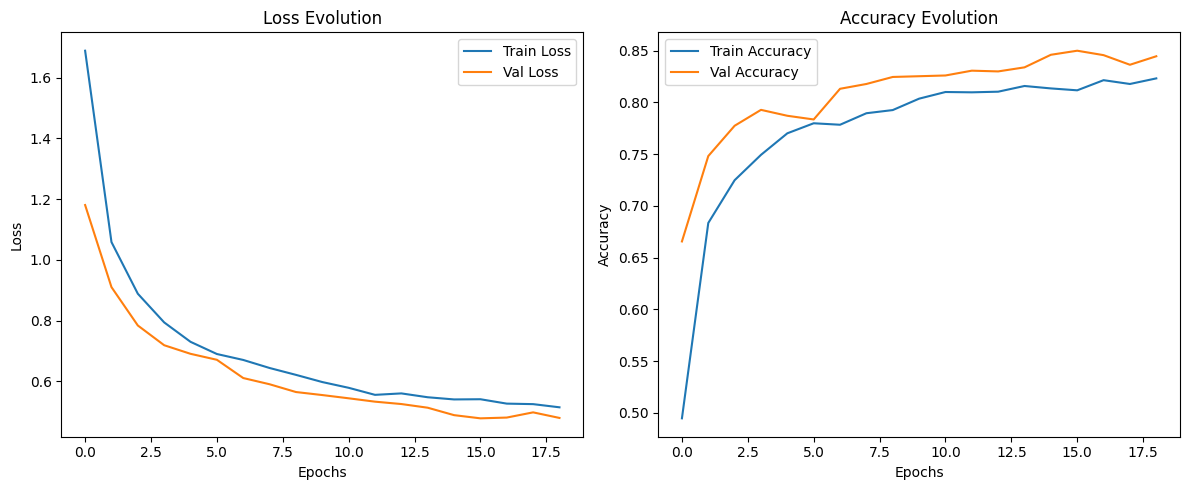

Évaluation sur le jeu de test:


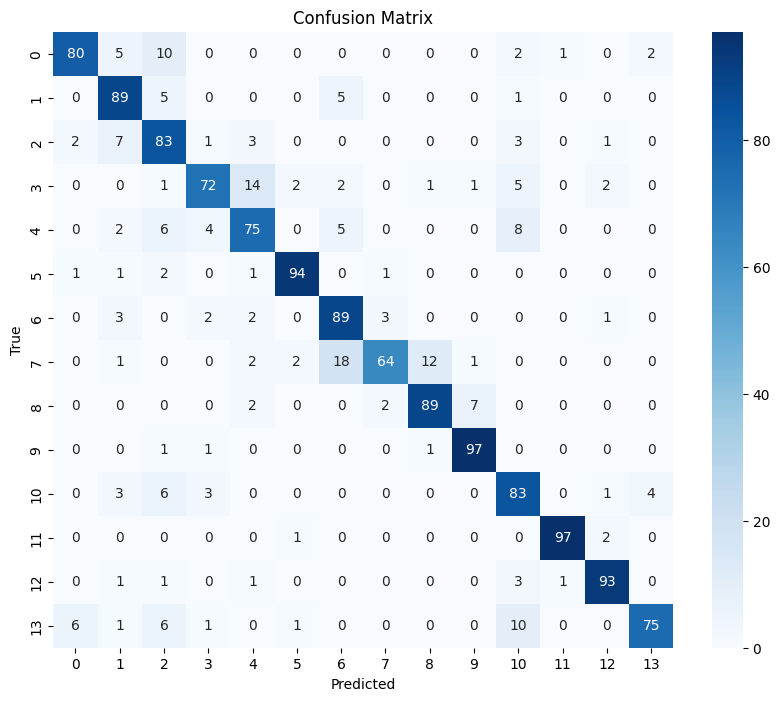

              precision    recall  f1-score   support

           0       0.90      0.80      0.85       100
           1       0.79      0.89      0.84       100
           2       0.69      0.83      0.75       100
           3       0.86      0.72      0.78       100
           4       0.75      0.75      0.75       100
           5       0.94      0.94      0.94       100
           6       0.75      0.89      0.81       100
           7       0.91      0.64      0.75       100
           8       0.86      0.89      0.88       100
           9       0.92      0.97      0.94       100
          10       0.72      0.83      0.77       100
          11       0.98      0.97      0.97       100
          12       0.93      0.93      0.93       100
          13       0.93      0.75      0.83       100

    accuracy                           0.84      1400
   macro avg       0.85      0.84      0.84      1400
weighted avg       0.85      0.84      0.84      1400



In [6]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
num_epochs = 40
patience = 3
best_val_loss = float('inf')
counter = 0


best_val_acc = 0.0

for epoch in range(num_epochs):
    # Entraînement
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    

    for inputs,labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total 
    epoch_acc = correct / total 
    print(f"Époque {epoch+1}/{num_epochs} — Perte: {epoch_loss:.4f} — Précision: {epoch_acc:.4f}")
    
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:  
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break
    
    if val_epoch_acc > best_val_acc:
        best_val_acc = val_epoch_acc
        torch.save(model.state_dict(), 'best_model_mobileNetv2.pth')
    
    print(f"Époque {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")
    print("-"*50)

plot_training_history(train_losses, val_losses, train_accs, val_accs)

# Évaluation finale
print("Évaluation sur le jeu de test:")
test_acc = evaluate_model(model, test_loader, device)


# Entrainement de la seconde Version du Modele MobileNetV2 
# nous avons degeler  les 20 derniers couches des features extraction faire un fine-tuning 

In [ ]:
from torch.optim.lr_scheduler import OneCycleLR
model = mobilenet_v2(pretrained=True)

for param in model.parameters():
    param.requires_grad = False

num_features = model.classifier[1].in_features
model.classifier = nn.Sequential(
    nn.Dropout(0.2),
    nn.Linear(num_features,14)
)
# débloquer les 20 derniers modules de features
for p in list(model.features.parameters())[-20:]:
    p.requires_grad = True



device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = torch.optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-3, weight_decay=1e-4)
scheduler = OneCycleLR(optimizer, max_lr=1e-2, steps_per_epoch=len(train_loader), epochs=num_epochs)

criterion = nn.CrossEntropyLoss()

Époque 1/40 — Perte: 0.0695 — Précision: 0.9827
Époque 1/40
Train Loss: 0.0695 | Train Acc: 0.9827
Val Loss: 0.0709 | Val Acc: 0.9807
--------------------------------------------------
Époque 2/40 — Perte: 0.0544 — Précision: 0.9867
Époque 2/40
Train Loss: 0.0544 | Train Acc: 0.9867
Val Loss: 0.0516 | Val Acc: 0.9886
--------------------------------------------------
Époque 3/40 — Perte: 0.0251 — Précision: 0.9954
Époque 3/40
Train Loss: 0.0251 | Train Acc: 0.9954
Val Loss: 0.0433 | Val Acc: 0.9904
--------------------------------------------------
Époque 4/40 — Perte: 0.0194 — Précision: 0.9962
Époque 4/40
Train Loss: 0.0194 | Train Acc: 0.9962
Val Loss: 0.0392 | Val Acc: 0.9879
--------------------------------------------------
Époque 5/40 — Perte: 0.0366 — Précision: 0.9910
Époque 5/40
Train Loss: 0.0366 | Train Acc: 0.9910
Val Loss: 0.0471 | Val Acc: 0.9871
--------------------------------------------------
Époque 6/40 — Perte: 0.0156 — Précision: 0.9969
Époque 6/40
Train Loss: 0.0

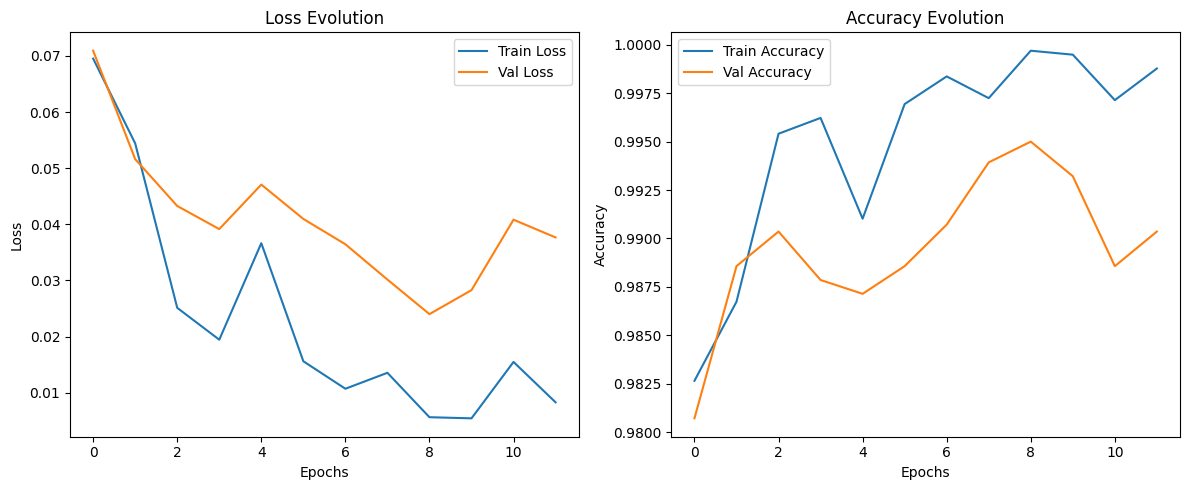

Évaluation sur le jeu de test:


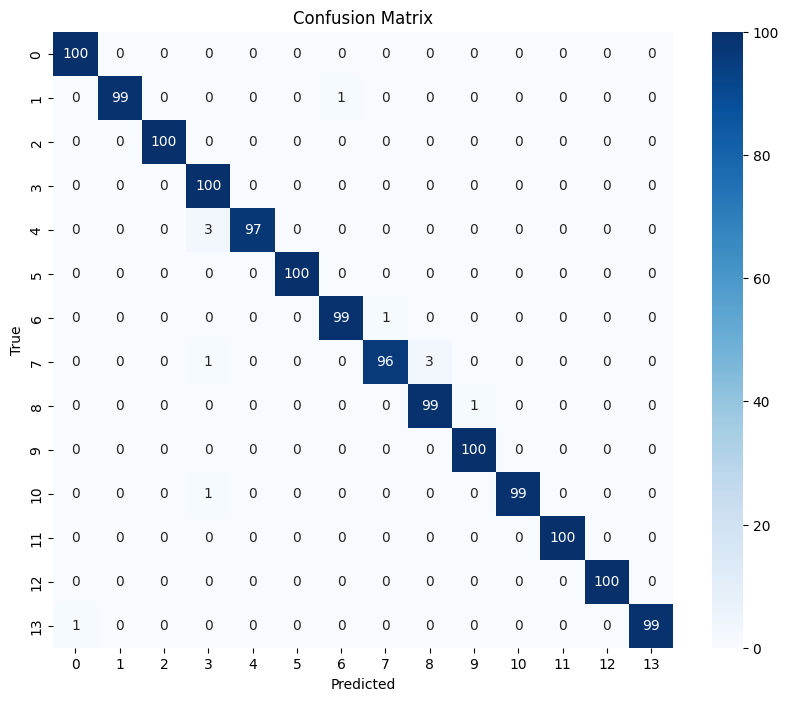

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       100
           1       1.00      0.99      0.99       100
           2       1.00      1.00      1.00       100
           3       0.95      1.00      0.98       100
           4       1.00      0.97      0.98       100
           5       1.00      1.00      1.00       100
           6       0.99      0.99      0.99       100
           7       0.99      0.96      0.97       100
           8       0.97      0.99      0.98       100
           9       0.99      1.00      1.00       100
          10       1.00      0.99      0.99       100
          11       1.00      1.00      1.00       100
          12       1.00      1.00      1.00       100
          13       1.00      0.99      0.99       100

    accuracy                           0.99      1400
   macro avg       0.99      0.99      0.99      1400
weighted avg       0.99      0.99      0.99      1400



In [ ]:
train_losses = []
train_accs = []
val_losses = []
val_accs = []
num_epochs = 40
patience = 3
best_val_loss = float('inf')
counter = 0


best_val_acc = 0.0

for epoch in range(num_epochs):
    # Entraînement
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0
    

    for inputs,labels in train_loader:
        inputs = inputs.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs,1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    epoch_loss = running_loss / total 
    epoch_acc = correct / total 
    print(f"Époque {epoch+1}/{num_epochs} — Perte: {epoch_loss:.4f} — Précision: {epoch_acc:.4f}")
    
    train_losses.append(epoch_loss)
    train_accs.append(epoch_acc)
    
    # Validation
    model.eval()
    val_running_loss = 0.0
    val_correct = 0
    val_total = 0
    
    with torch.no_grad():
        for inputs, labels in val_loader:  
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            
            val_running_loss += loss.item() * inputs.size(0)
            _, predicted = torch.max(outputs, 1)
            val_correct += (predicted == labels).sum().item()
            val_total += labels.size(0)
    
    val_epoch_loss = val_running_loss / val_total
    val_epoch_acc = val_correct / val_total
    val_losses.append(val_epoch_loss)
    val_accs.append(val_epoch_acc)
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
    else:
        counter += 1
        if counter >= patience:
            print("Early stopping!")
            break
    
    if val_epoch_acc > best_val_acc:     
        best_val_acc = val_epoch_acc
        torch.save(model.state_dict(), 'Modeltest1.pth')
    
    print(f"Époque {epoch+1}/{num_epochs}")
    print(f"Train Loss: {epoch_loss:.4f} | Train Acc: {epoch_acc:.4f}")
    print(f"Val Loss: {val_epoch_loss:.4f} | Val Acc: {val_epoch_acc:.4f}")
    print("-"*50)

plot_training_history(train_losses, val_losses, train_accs, val_accs)

# Évaluation finale
print("Évaluation sur le jeu de test:")
test_acc = evaluate_model(model, test_loader, device)


# Partie Du esamble Learning des Modele deja entrainer MobileNetv2 et MobileNetV3

In [ ]:
from torchvision.models import mobilenet_v3_large
model_v3 = mobilenet_v3_large(pretrained=True)

for param in model_v3.parameters():
    param.requires_grad = False

num_features = model_v3.classifier[-1].in_features
dummy_input = torch.randn(1, 3, 128, 128) 
dummy_output = model_v3.features(dummy_input)
num_ftrs = dummy_output.view(-1).shape[0]

model_v3.classifier[3] = nn.Linear(1280, 14)  
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_v3 = model_v3.to(device)
print(device)

optimizer = torch.optim.Adam([
    {'params': model_v3.classifier.parameters(), 'lr': 1e-3},  
    {'params': model_v3.features[-10:].parameters(), 'lr': 1e-5}  
], weight_decay=1e-4)

criterion = nn.CrossEntropyLoss()

C:\Users\Boumala\AppData\Roaming\Python\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Dimension réelle des features: 15360
cuda:0


In [ ]:
model.load_state_dict(torch.load('Modeltest1.pth'))
model_v3.load_state_dict(torch.load('best_model.pth'))
model.eval();  model_v3.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for imgs, labels in test_loader:
        imgs = imgs.to(device)
        p2 = torch.softmax(model(imgs), dim=1).cpu().numpy()
        p3 = torch.softmax(model_v3(imgs), dim=1).cpu().numpy()
        avg = 0.7 * p2 + 0.3 * p3
        preds = avg.argmax(axis=1)
        all_preds.extend(preds)
        all_labels.extend(labels.numpy())

from sklearn.metrics import accuracy_score
print("Ensemble simple Acc:", accuracy_score(all_labels, all_preds))

Ensemble simple Acc: 0.9950071326676176


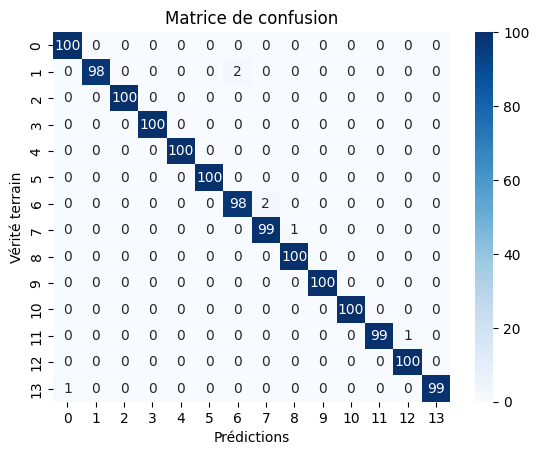

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion")
plt.show()


Classification Report :

              precision    recall  f1-score   support

   Gesture_0       0.99      1.00      1.00       100
   Gesture_1       1.00      0.98      0.99       100
  Gesture_10       1.00      1.00      1.00       100
  Gesture_11       1.00      1.00      1.00       102
  Gesture_12       1.00      1.00      1.00       100
  Gesture_13       1.00      1.00      1.00       100
   Gesture_2       0.98      0.98      0.98       100
   Gesture_3       0.98      0.99      0.99       100
   Gesture_4       0.99      1.00      1.00       100
   Gesture_5       1.00      1.00      1.00       100
   Gesture_6       1.00      1.00      1.00       100
   Gesture_7       1.00      0.99      0.99       100
   Gesture_8       0.99      1.00      1.00       100
   Gesture_9       1.00      0.99      0.99       100

    accuracy                           1.00      1402
   macro avg       1.00      0.99      0.99      1402
weighted avg       1.00      1.00      1.00      1402



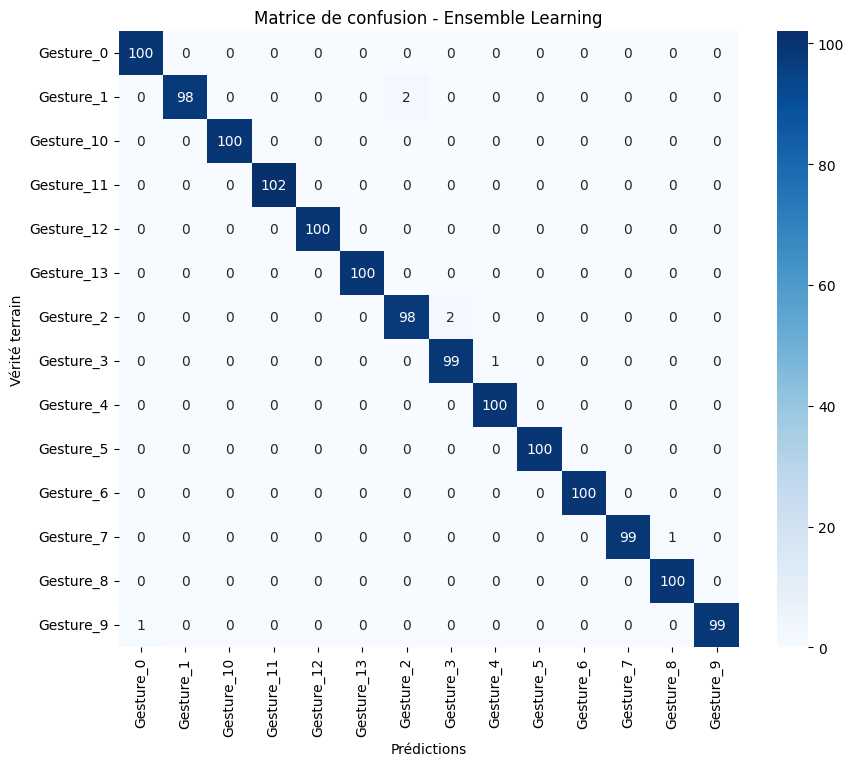

In [ ]:
import os
from PIL import Image
import torch
from torchvision import transforms
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
import joblib

class_names = joblib.load("class_names.pkl")  
class_to_idx = {name: idx for idx, name in enumerate(class_names)}


image_dir = "TestStatique" 
transform = transforms.Compose([
    transforms.Resize((224, 224)), 
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

all_preds = []
all_labels = []

for filename in os.listdir(image_dir):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        gesture_id = int(filename.split("_")[1])  
        gesture_name = f"Gesture_{gesture_id}"
        true_label = class_to_idx[gesture_name]
        all_labels.append(true_label)

        path = os.path.join(image_dir, filename)
        img = Image.open(path).convert('RGB')
        input_tensor = transform(img).unsqueeze(0).to(device)

        with torch.no_grad():
            p2 = torch.softmax(model(input_tensor), dim=1).cpu().numpy()
            p3 = torch.softmax(model_v3(input_tensor), dim=1).cpu().numpy()
            avg = 0.7 * p2 + 0.3 * p3
            pred = avg.argmax(axis=1)[0]
            all_preds.append(pred)

print("Classification Report :\n")
print(classification_report(all_labels, all_preds, target_names=class_names))

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Prédictions")
plt.ylabel("Vérité terrain")
plt.title("Matrice de confusion - Ensemble Learning")
plt.show()


In [ ]:
import cv2
import torch
import numpy as np
from torchvision import transforms
from PIL import Image
import joblib

model.eval()
model_v3.eval()

class_names = joblib.load("class_names.pkl")

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

cap = cv2.VideoCapture(0)

print("Appuyez sur 'q' pour quitter.")

while True:
    ret, frame = cap.read()
    if not ret:
        break

    img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    pil_img = Image.fromarray(img_rgb)

    input_tensor = transform(pil_img).unsqueeze(0).to(device)

    with torch.no_grad():
        p1 = torch.softmax(model(input_tensor), dim=1).cpu().numpy()
        p2 = torch.softmax(model_v3(input_tensor), dim=1).cpu().numpy()
        avg = 0.7 * p1 + 0.3 * p2
        pred_idx = avg.argmax(axis=1)[0]
        pred_label = class_names[pred_idx]
        confidence = np.max(avg)

    cv2.putText(frame, f"{pred_label} ({confidence:.2f})", (10, 40),
                cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow("Détection en temps réel", frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


Appuyez sur 'q' pour quitter.
